In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Loading Dataset
df = pd.read_csv('Company_Data.csv')

#EDA & Data Preprocessing

In [3]:
df.head()


Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
df.sample(10)


Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
201   5.94        138      83            0         139    134    Medium   54   
196   4.10        130      28            6         410    133       Bad   72   
396   6.14        139      23            3          37    120    Medium   55   
270  11.99        119      26            0         284     89      Good   26   
352  13.44        133     103           14         288    122      Good   61   
209   3.02         98      21           11         326     90       Bad   76   
130   8.41         94      84           13         497     77    Medium   51   
165   0.37        147      58            7         100    191       Bad   27   
212  12.04        145      69           19         501    105    Medium   45   
7    11.85        136      81           15         425    120      Good   67   

     Education Urban   US  
201         18   Yes   No  
196         16   Yes  Yes  
396         11    No  Yes  
270         10   Yes   No  
352         17   Yes  Yes  
209         11    No  Yes  
130         12   Yes  Yes  
165         15   Yes  Yes  
212         11   Yes  Yes  
7           10   Yes  Yes

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()


Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

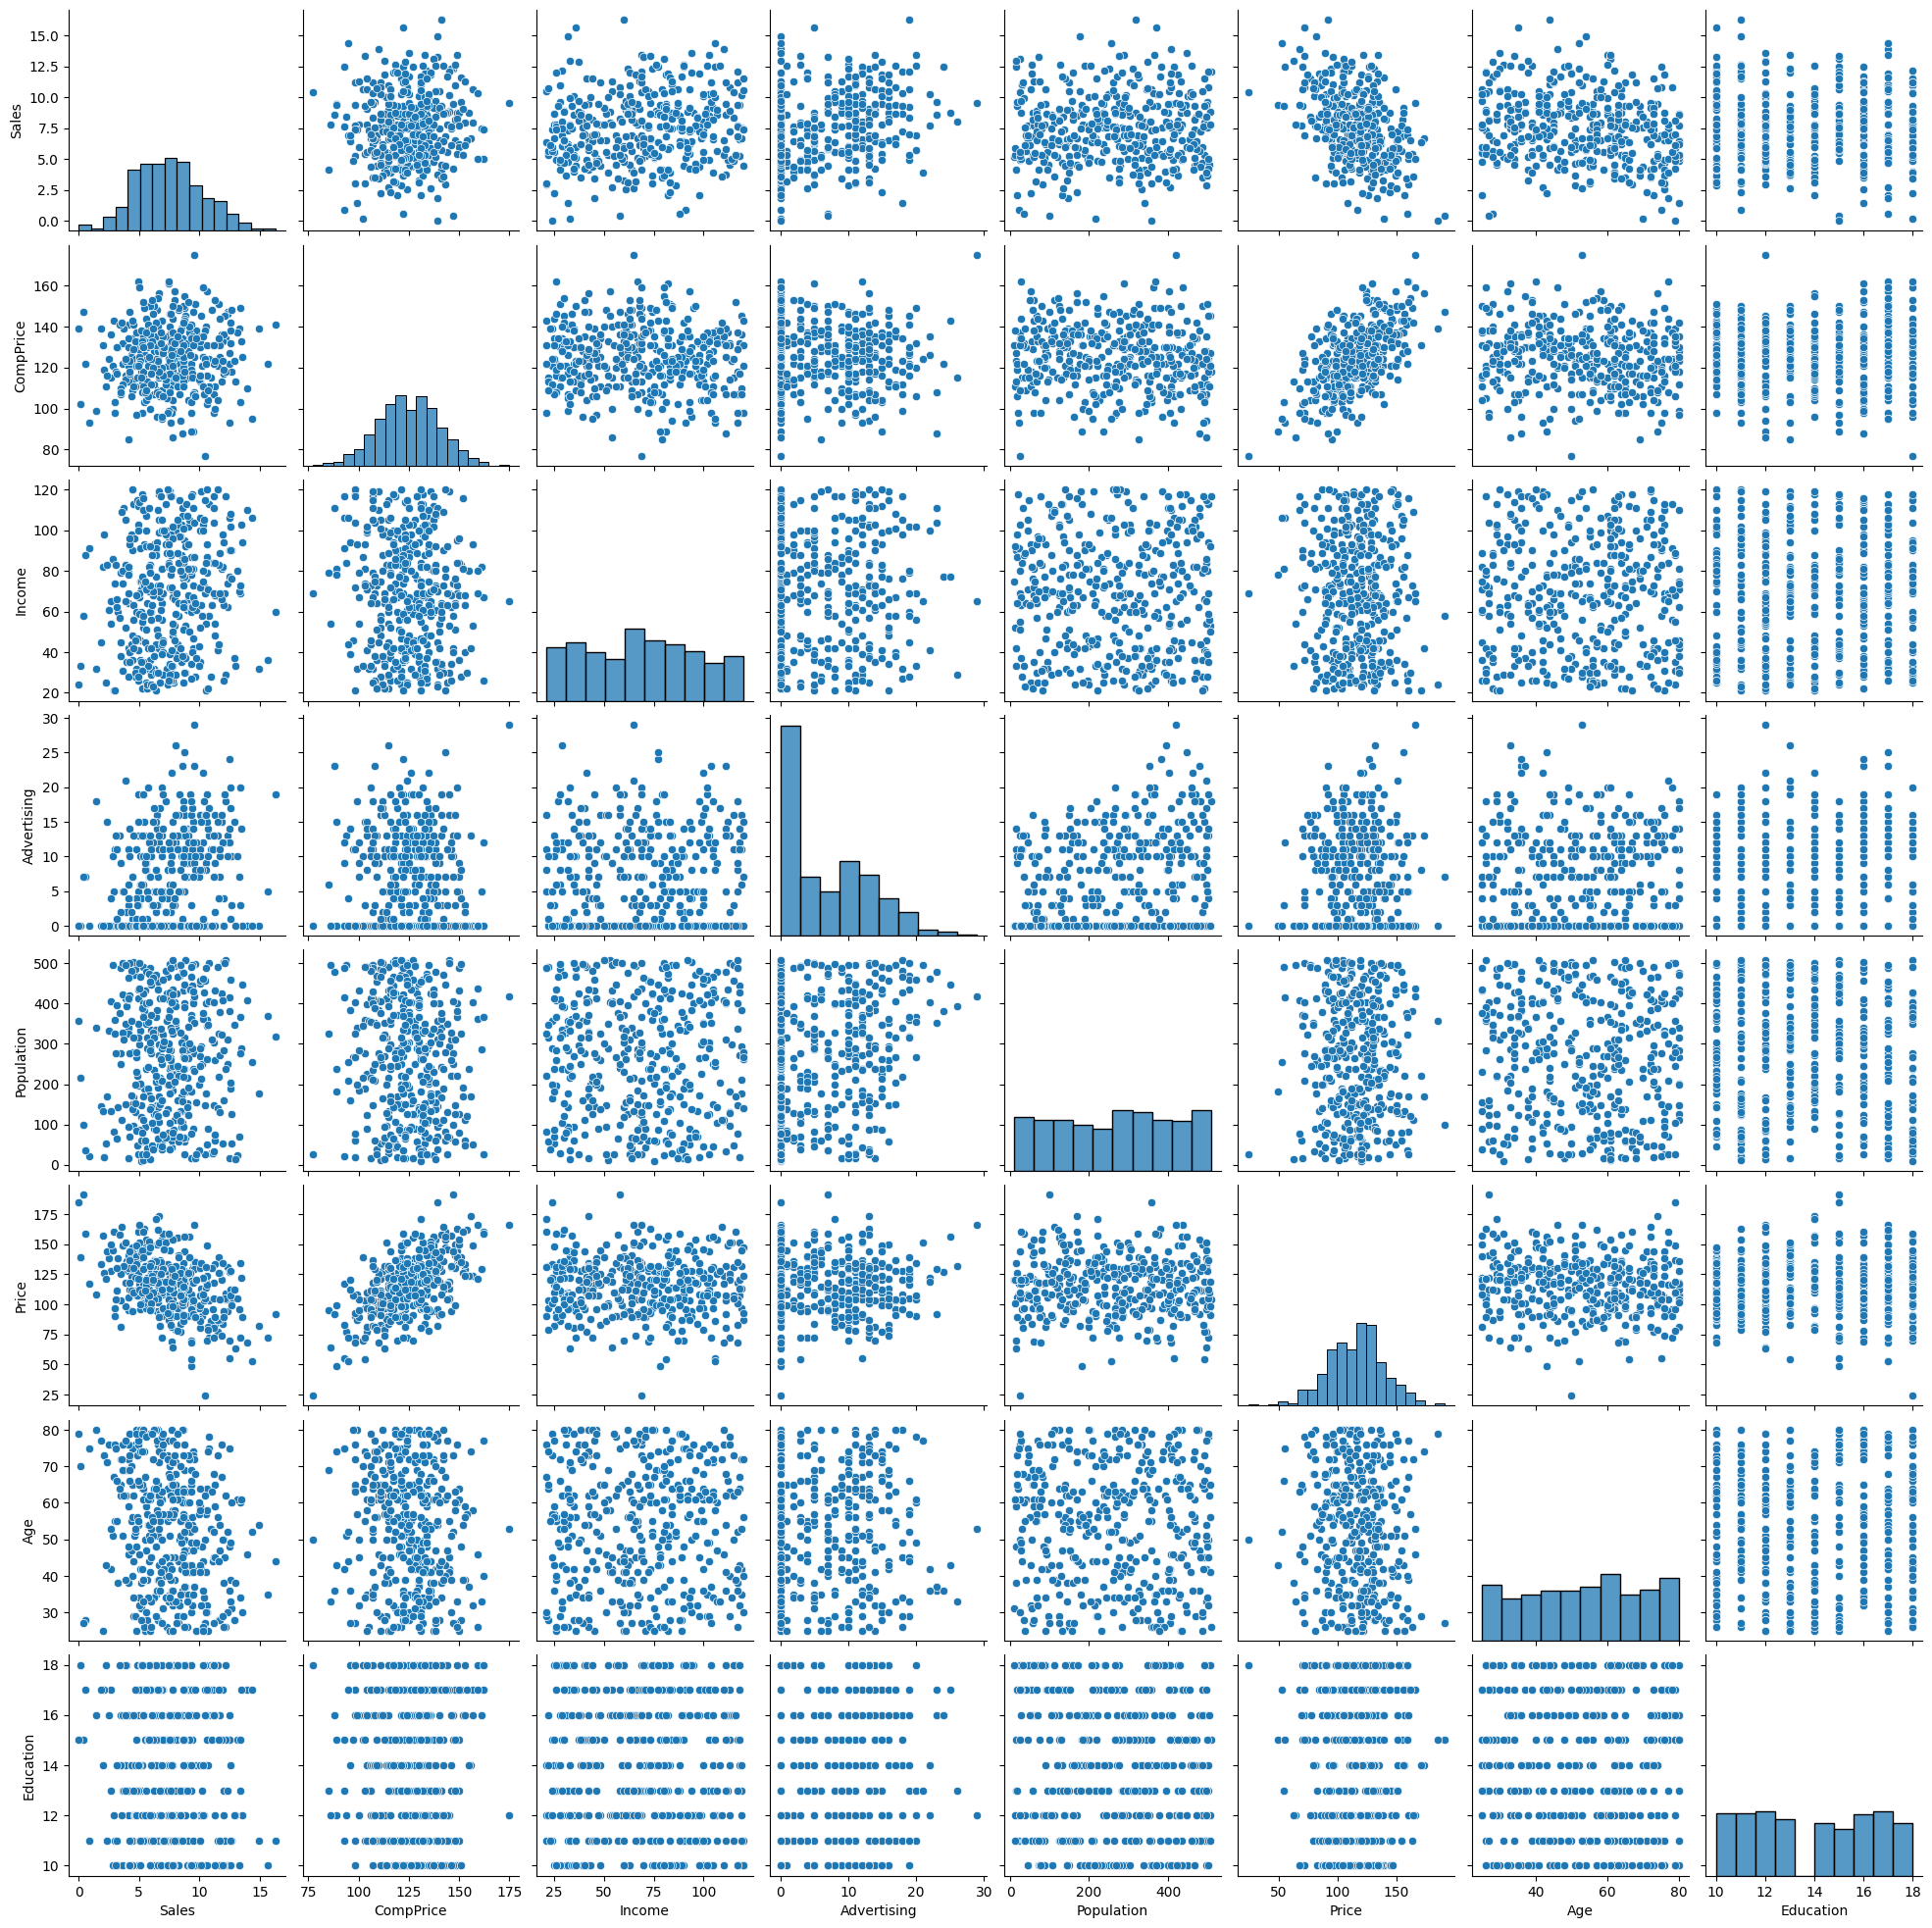

In [7]:
# pairplot
import seaborn as sns
sns.pairplot(df)

<ipython-input-9-ec06b5e02bc1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


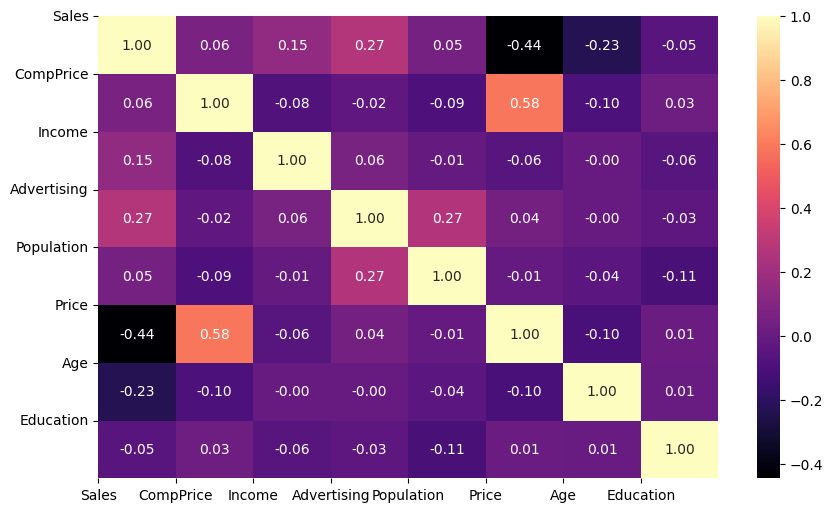

In [9]:
# Correlation analysis for data
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [12]:
# checking count of categories for categorical columns colums
df['ShelveLoc'].replace('Bad', 999, inplace=True)
df = df[df['ShelveLoc'] != 'Bad']


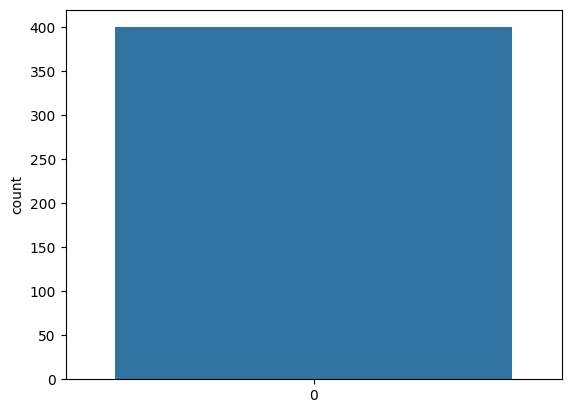

In [15]:
# checking count of categories for categorical columns colums
sns.countplot(df['ShelveLoc'])
plt.show()

# Applying Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

In [19]:
df = pd.get_dummies(df)
df.head()


Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban_No  Urban_Yes  US_No  US_Yes  
0         17         0          1      0       1  
1         10         0          1      0       1  
2         12         0          1      0       1  
3         14         0          1      0       1  
4         13         0          1      1       0

In [20]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
df['Sales'] = pd.cut(x=df['Sales'],bins=[0, 6, 12, 18], labels=['Low','Medium', 'High'], right = False)
df['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [21]:
df['Sales'].value_counts()


Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [22]:
df.head()


Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0  Medium        138      73           11         276    120          0   42   
1  Medium        111      48           16         260     83          1   65   
2  Medium        113      35           10         269     80          2   59   
3  Medium        117     100            4         466     97          2   55   
4     Low        141      64            3         340    128          0   38   

   Education  Urban_No  Urban_Yes  US_No  US_Yes  
0         17         0          1      0       1  
1         10         0          1      0       1  
2         12         0          1      0       1  
3         14         0          1      0       1  
4         13         0          1      1       0

In [23]:
dataset = df.values


In [24]:
# split into input (X) and output (y) variables
X = dataset[:, 1:]
y = dataset[:,0]


In [25]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [27]:
# summarize scores
scores = fit.scores_
features = fit.transform(X)

In [28]:
scores


array([3.89832180e+00, 8.05201343e+01, 1.44508146e+02, 1.52363180e-01,
       2.49402227e+02, 9.54846846e+00, 6.64274764e+01, 1.30633499e+00,
       1.44231440e-01, 6.03521628e-02, 5.19910473e+00, 2.86152276e+00])

In [29]:
df.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_No', 'Urban_Yes', 'US_No',
       'US_Yes'],
      dtype='object')

In [30]:
col_names = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']

In [31]:
score_df = pd.DataFrame(list(zip(scores, col_names)),
               columns =['Score', 'Feature'])

In [32]:
score_df


Score           Feature
0     3.898322         CompPrice
1    80.520134            Income
2   144.508146       Advertising
3     0.152363        Population
4   249.402227             Price
5     9.548468               Age
6    66.427476         Education
7     1.306335     ShelveLoc_Bad
8     0.144231    ShelveLoc_Good
9     0.060352  ShelveLoc_Medium
10    5.199105          Urban_No
11    2.861523         Urban_Yes

In [34]:
df['ShelveLoc_Bad'] = np.random.randint(0, 2, size=len(df))
df['ShelveLoc_Good'] = np.random.randint(0, 2, size=len(df))
df['ShelveLoc_Medium'] = np.random.randint(0, 2, size=len(df))

In [35]:
data_model = df[['Sales', 'Price', 'Advertising', 'Income', 'Age', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium']]
data_model.head()

Sales  Price  Advertising  Income  Age  ShelveLoc_Bad  ShelveLoc_Good  \
0  Medium    120           11      73   42              1               1   
1  Medium     83           16      48   65              0               0   
2  Medium     80           10      35   59              0               0   
3  Medium     97            4     100   55              1               0   
4     Low    128            3      64   38              0               0   

   ShelveLoc_Medium  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [36]:
X = data_model.iloc[:, 1:]
y = df['Sales']

# Splitting data into train and test data

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(268, 7)
(132, 7)
(268,)
(132,)


# Random Forest Classification

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 'auto'
skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [40]:
# Train the model on training data
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto')

In [45]:
results = cross_val_score(model, x_train, y_train, cv=5)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

0.5970649895178197


#Bagged Decision Trees for Classification


In [50]:
from sklearn.ensemble import BaggingClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=5)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.5821802935010483


# AdaBoost Classification


In [52]:
from sklearn.ensemble import AdaBoostClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = AdaBoostClassifier(n_estimators=10, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=5)
print(results.mean())

0.6158630328441649
